<a href="https://colab.research.google.com/github/shahidfarhan22/ML_models/blob/main/Movies_Genre_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Movie Genres Classification**

Predicting the genre of movie from just 1000 characters of the script.

In [1]:

# Importing essential libraries
import pandas as pd
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
# Loading the dataset
df = pd.read_csv('/content/drive/MyDrive/Projects/train.csv')

# **Exploring the dataset**

In [4]:

df.columns

Index(['id', 'text', 'genre'], dtype='object')

In [5]:

df.shape

(22579, 3)

In [6]:

df.head(10)

,id,text,genre
0,0,"eady dead, maybe even wishing he was. INT. 2ND...",thriller
1,2,"t, summa cum laude and all. And I'm about to l...",comedy
2,3,"up Come, I have a surprise.... She takes him ...",drama
3,4,ded by the two detectives. INT. JEFF'S APARTME...,thriller
4,5,"nd dismounts, just as the other children reach...",drama
5,6,breadth of the bluff. Gabe pulls out his ancie...,thriller
6,7,uilding. A MAN in pajamas runs out into the ra...,thriller
7,9,ELLES AND RITA HAYWORTH Just disgustingly rich...,drama
8,10,"Memphis goes back into the garage, Budgy cack...",thriller
9,11,e reels as the world spins. Sweat pours off hi...,action


In [7]:

# Importing essential libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

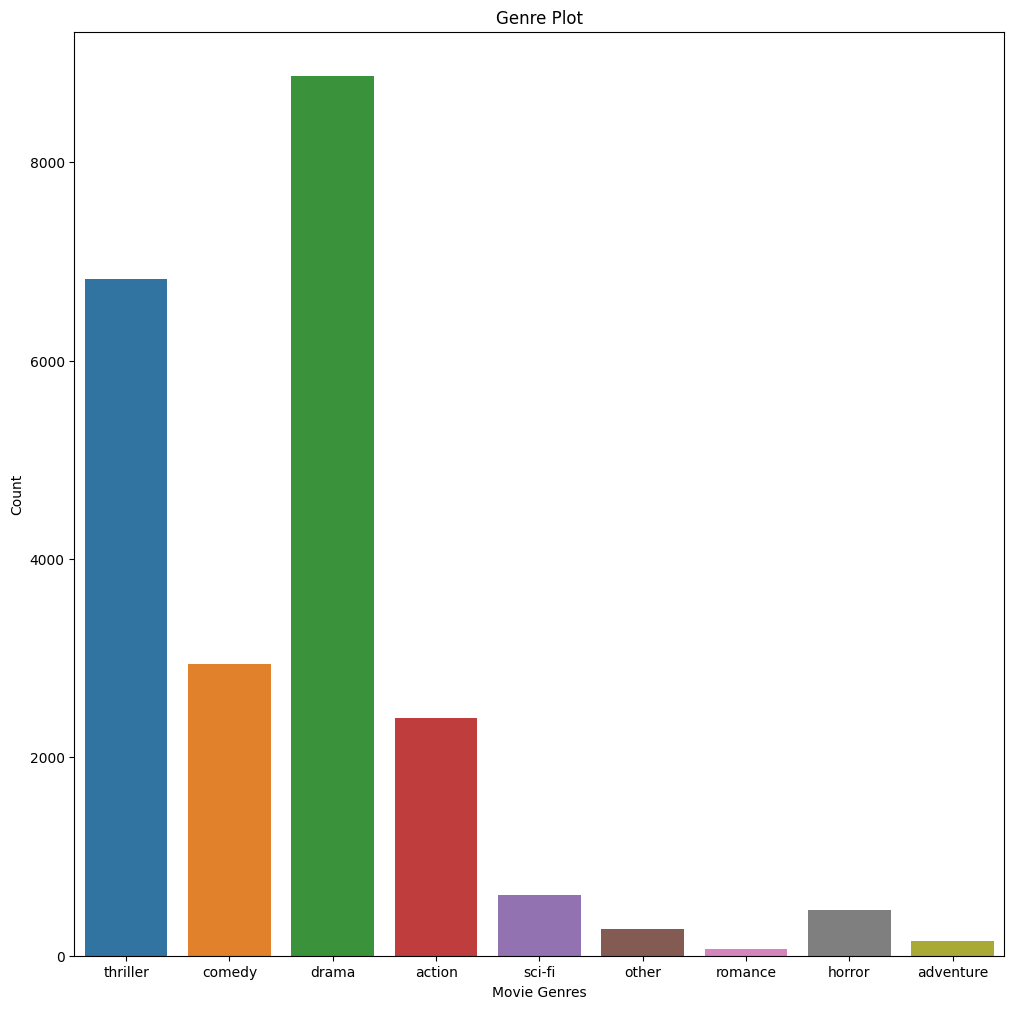

In [8]:
# Visualizing the count of 'genre' column from the dataset
plt.figure(figsize=(12,12))
sns.countplot(x='genre', data=df)
plt.xlabel('Movie Genres')
plt.ylabel('Count')
plt.title('Genre Plot')
plt.show()



# Data Cleaning and Preprocessing

In [9]:

# Finding unique genres
movie_genre = list(df['genre'].unique())
movie_genre.sort()
movie_genre

['action',
 'adventure',
 'comedy',
 'drama',
 'horror',
 'other',
 'romance',
 'sci-fi',
 'thriller']

In [10]:

# Mapping the genres to values
genre_mapper = {'other': 0, 'action': 1, 'adventure': 2, 'comedy':3, 'drama':4, 'horror':5, 'romance':6, 'sci-fi':7, 'thriller': 8}
df['genre'] = df['genre'].map(genre_mapper)
df.head(10)

,id,text,genre
0,0,"eady dead, maybe even wishing he was. INT. 2ND...",8
1,2,"t, summa cum laude and all. And I'm about to l...",3
2,3,"up Come, I have a surprise.... She takes him ...",4
3,4,ded by the two detectives. INT. JEFF'S APARTME...,8
4,5,"nd dismounts, just as the other children reach...",4
5,6,breadth of the bluff. Gabe pulls out his ancie...,8
6,7,uilding. A MAN in pajamas runs out into the ra...,8
7,9,ELLES AND RITA HAYWORTH Just disgustingly rich...,4
8,10,"Memphis goes back into the garage, Budgy cack...",8
9,11,e reels as the world spins. Sweat pours off hi...,1


In [11]:

# Finding any NaN values
df.isna().any()

id       False
text     False
genre    False
dtype: bool

In [12]:

# Removing the 'id' column
df.drop('id', axis=1, inplace=True)
df.columns

Index(['text', 'genre'], dtype='object')

In [13]:
# Importing essential libraries for performing Natural Language Processing on given dataset
import nltk
import re
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [14]:
df.shape

(22579, 2)

In [15]:
# Cleaning the text
corpus = []
ps = PorterStemmer()

for i in range(0, df.shape[0]):

  # Cleaning special character from the dialog/script
  dialog = re.sub(pattern='[^a-zA-Z]', repl=' ', string=df['text'][i])

  # Converting the entire dialog/script into lower case
  dialog = dialog.lower()

  # Tokenizing the dialog/script by words
  words = dialog.split()

  # Removing the stop words
  dialog_words = [word for word in words if word not in set(stopwords.words('english'))]

  # Stemming the words
  words = [ps.stem(word) for word in dialog_words]

  # Joining the stemmed words
  dialog = ' '.join(words)

  # Creating a corpus
  corpus.append(dialog)

In [16]:
corpus[0:10]

['eadi dead mayb even wish int nd floor hallway three night orderli lead liza door orderli white guy open door step room three white guy mid look wild straight jacket jerri liza reach end rope shake head int decrepit hospit room night ball fetal realli head press cement tri sing jerri blue moon blue moon int nd floor hallway three night liza stand lean rail wall orderli sure go know bad orderli okay liza start hall orderli follow orderli got new patient last week want see liza wave hopeless stop chicken wire window end hall look light break jerri somewher orderli look gotta get back work',
 'summa cum laud launch brand new magazin call expos homag miss juli conroy xenia ohio juli grin juli know find excel editor chief ted yellow page juli let finger walk suddenli music chang peopl ted grin ted play song extend hand dare ask danc juli take hand better ted juli begin danc kiss b g charli jimmi feign tear charli sucker happi end hug jimmi hold start rise nelson hous cloud xenia ted v gues

In [17]:
df[df['genre']==4].index

Int64Index([    2,     4,     7,    10,    11,    12,    13,    14,    15,
               16,
            ...
            22553, 22560, 22561, 22563, 22564, 22567, 22568, 22571, 22574,
            22575],
           dtype='int64', length=8873)

In [18]:
len(corpus)

22579

In [19]:
drama_words = []
for i in list(df[df['genre']==4].index):
  drama_words.append(corpus[i])

action_words = []
for i in list(df[df['genre']==1].index):
  action_words.append(corpus[i])

comedy_words = []
for i in list(df[df['genre']==3].index):
  comedy_words.append(corpus[i])

drama = ''
action = ''
comedy = ''
for i in range(0, 3):
  drama += drama_words[i]
  action += action_words[i]
  comedy += comedy_words[i]

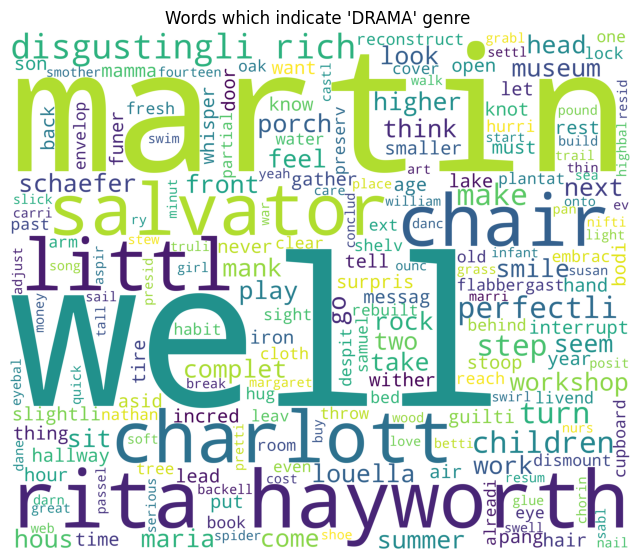

In [20]:
# Creating wordcloud for drama genre
from wordcloud import WordCloud
wordcloud1 = WordCloud(background_color='white', width=3000, height=2500).generate(drama)
plt.figure(figsize=(8,8))
plt.imshow(wordcloud1)
plt.axis('off')
plt.title("Words which indicate 'DRAMA' genre ")
plt.show()

In [ ]:
# Creating wordcloud for action genre
wordcloud2 = WordCloud(background_color='white', width=3000, height=2500).generate(action)
plt.figure(figsize=(8,8))
plt.imshow(wordcloud2)
plt.axis('off')
plt.title("Words which indicate 'ACTION' genre ")
plt.show()

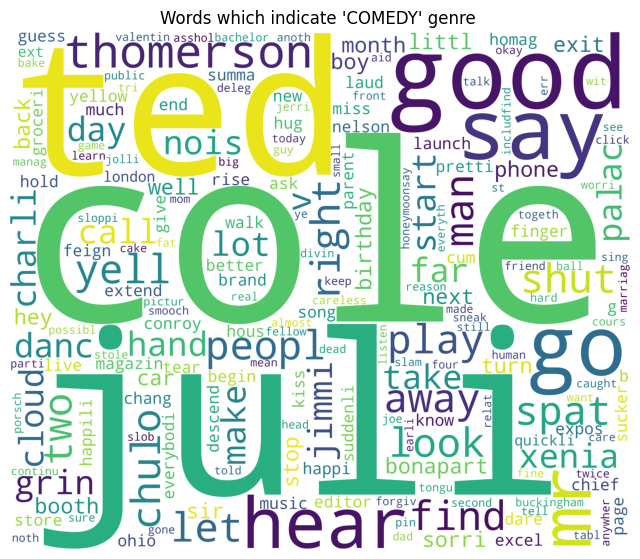

In [21]:
# Creating wordcloud for comedy genre
wordcloud3 = WordCloud(background_color='white', width=3000, height=2500).generate(comedy)
plt.figure(figsize=(8,8))
plt.imshow(wordcloud3)
plt.axis('off')
plt.title("Words which indicate 'COMEDY' genre ")
plt.show()

In [22]:
# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=10000, ngram_range=(1,2))
X = cv.fit_transform(corpus).toarray()

In [23]:
y = df['genre'].values

## Model Building

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)
print('X_train size: {}, X_test size: {}'.format(X_train.shape, X_test.shape))

X_train size: (18063, 10000), X_test size: (4516, 10000)


# **Multinomial Naive Bayes**

In [25]:
# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import MultinomialNB
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

MultinomialNB()

In [26]:
# Predicting the Test set results
nb_y_pred = nb_classifier.predict(X_test)

In [27]:
# Calculating Accuracy
from sklearn.metrics import accuracy_score
score1 = accuracy_score(y_test, nb_y_pred)
print("---- Score ----")
print("Accuracy score is: {}%".format(round(score1*100,2)))

---- Score ----
Accuracy score is: 89.57%


In [28]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
nb_cm = confusion_matrix(y_test, nb_y_pred)

In [29]:
nb_cm


array([[  62,    1,    0,    0,    1,    2,    0,    0,    0],
       [   0,  450,    0,    8,    6,    1,    0,    0,   11],
       [   0,    2,   41,    0,    1,    0,    0,    0,    1],
       [   0,    7,    0,  517,   18,    2,    0,    4,   11],
       [   3,   42,    1,   38, 1607,   21,    1,   11,  103],
       [   0,    1,    0,    1,    4,   73,    0,    0,    3],
       [   0,    1,    0,    0,    0,    0,   10,    0,    0],
       [   0,    2,    0,    2,    7,    1,    0,  112,    8],
       [   0,   14,    0,   21,   77,   11,    0,   22, 1173]])

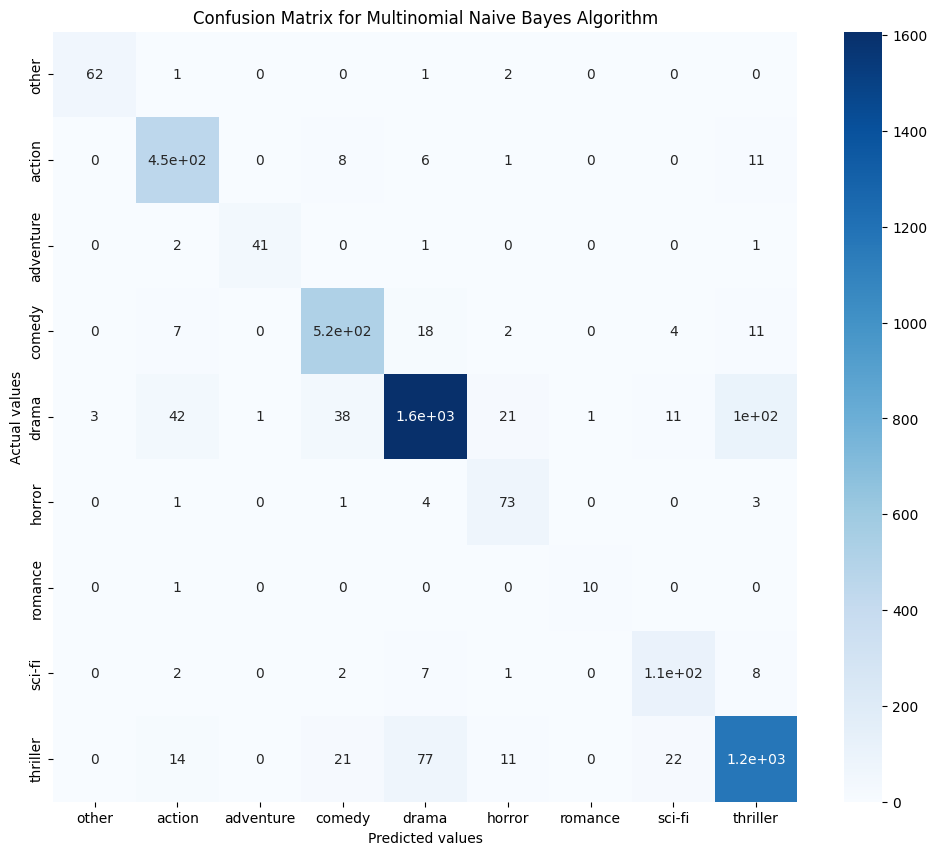

In [33]:
# Plotting the confusion matrix
plt.figure(figsize=(12,10))
axis_labels = ['other', 'action', 'adventure', 'comedy', 'drama', 'horror', 'romance', 'sci-fi', 'thriller']
sns.heatmap(data=nb_cm, annot=True, cmap="Blues", xticklabels=axis_labels, yticklabels=axis_labels)
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('Confusion Matrix for Multinomial Naive Bayes Algorithm')
plt.show()

In [34]:
# Hyperparameter tuning the Naive Bayes Classifier
best_accuracy = 0.0
alpha_val = 0.0
for i in np.arange(0.1,1.1,0.1):
  temp_classifier = MultinomialNB(alpha=i)
  temp_classifier.fit(X_train, y_train)
  temp_y_pred = temp_classifier.predict(X_test)
  score = accuracy_score(y_test, temp_y_pred)
  print("Accuracy score for alpha={} is: {}%".format(round(i,1), round(score*100,2)))
  if score>best_accuracy:
    best_accuracy = score
    alpha_val = i
print('--------------------------------------------')
print('The best accuracy is {}% with alpha value as {}'.format(round(best_accuracy*100, 2), round(alpha_val,1)))

Accuracy score for alpha=0.1 is: 91.34%
Accuracy score for alpha=0.2 is: 91.08%
Accuracy score for alpha=0.3 is: 90.85%
Accuracy score for alpha=0.4 is: 90.59%
Accuracy score for alpha=0.5 is: 90.26%
Accuracy score for alpha=0.6 is: 90.12%
Accuracy score for alpha=0.7 is: 90.04%
Accuracy score for alpha=0.8 is: 89.95%
Accuracy score for alpha=0.9 is: 89.79%
Accuracy score for alpha=1.0 is: 89.57%
--------------------------------------------
The best accuracy is 91.34% with alpha value as 0.1


In [35]:
classifier = MultinomialNB(alpha=0.1)
classifier.fit(X_train, y_train)

MultinomialNB(alpha=0.1)

Predictions
# **New Section**

In [36]:
def genre_prediction(sample_script):
  sample_script = re.sub(pattern='[^a-zA-Z]',repl=' ', string=sample_script)
  sample_script = sample_script.lower()
  sample_script_words = sample_script.split()
  sample_script_words = [word for word in sample_script_words if not word in set(stopwords.words('english'))]
  ps = PorterStemmer()
  final_script = [ps.stem(word) for word in sample_script_words]
  final_script = ' '.join(final_script)

  temp = cv.transform([final_script]).toarray()
  return classifier.predict(temp)[0]

In [37]:
# For generating random integer
from random import randint

In [39]:
# Loading test dataset
test = pd.read_csv('/content/drive/MyDrive/Projects/test.csv')
test.columns

Index(['id', 'text'], dtype='object')

In [40]:
test.shape

(5589, 2)

In [41]:
test.drop('id', axis=1, inplace=True)
test.head(10)

,text
0,glances at her. BOOK Maybe I ought to learn t...
1,hout breaking stride. Tatiana sees her and can...
2,dead bodies. GEORDI Mitchell... DePaul... LANG...
3,take myself. BRANDON How bad is the other thi...
4,"her body to shield his own. KAY Freeze it, Bug..."
5,im from ear to ear. Ya want me to make a state...
6,"BEN We need to help Reed Sue shakes her head,..."
7,slowly. At the entrance to the alley stands a ...
8,edge of the field. Neil steps closer. THE TOMB...
9,"special, take ya in the kitchen and suck your ..."


In [42]:
# Predicting values
row = randint(0,test.shape[0]-1)
sample_script = test.text[row]

print('Script: {}'.format(sample_script))
value = genre_prediction(sample_script)
print('Prediction: {}'.format(list(genre_mapper.keys())[value]))

Script: ars than play pinochle he gets elected Governor and right away he thinks he's Tarzan! HARTMAN thrusting the document at the Mayor Read it! Insane, he says. shaking a finger in Pinkus' face He knows very well that Williams ain't insane! PINKUS Yeah. But I MAYOR interrupting Pure politics! HARTMAN An attempt to ruin us! The phone rings. Hartman starts for it. MAYOR reading Dementia praecox Oh h h! HARTMAN We got to think fast before those lying reporters get hold of this. What'll we tell 'em? MAYOR Tell 'em the party is through in this State on account of you. HARTMAN Ah, Fred into phone Hello... this is Hartman MAYOR apoplectic And you can tell 'em as an afterthought that I want your resignation now! HARTMAN from the phone Sssh. Wait, Fred. excitedly, into phone What?... Where?... Where? Holy Moses! MAYOR What is it? HARTMAN They got him! back to phone Wait a minute hold the wire. to the Mayor They got Earl Williams surrounded the Riot Squad has in his house. MAYOR Tell 'em to h

In [43]:
# Predicting values
row = randint(0,test.shape[0]-1)
sample_script = test.text[row]

print('Script: {}'.format(sample_script))
value = genre_prediction(sample_script)
print('Prediction: {}'.format(list(genre_mapper.keys())[value]))

Script: ps of the trees and blows debris down the street. We see a well worn vehicle moving past a filling station. Two young rock jocks are driving by in their impossibly mudcaked jeep. Loud music blasts from their stereo. The two young men are BRETT and EVAN. They wear bright colored jackets and have their hats backwards over their long hair. Wraparound shades adorn Brett's face. Brett notices Gabe's Bronco crossing the intersection. He wildly honks the horn and does a radical U turn. BRETT Gabe! Hey, man! Gabe! It's Gabe! EVAN How yo doin', Gabe! Gabe wheels a bit closer. They drive side by side. GABE Hey, Brett. Hey, Evan. EVAN Where ya been, man? GABE Working in Denver. BRETT Work! Don't say that word, man. EVAN Man, I hate work even when somebody else does it! BRETT Hey, Gabe, we're flyin' off the Tower today. C'mon with us. EVAN C'mon, man it's perfect weather for a monster, full fledged gutrush! GABE No, you guys are too good. BRETT You heard it here, folks! EVAN I heard! Hey, 

In [44]:
# Predicting values
row = randint(0,test.shape[0]-1)
sample_script = test.text[row]

print('Script: {}'.format(sample_script))
value = genre_prediction(sample_script)
print('Prediction: {}'.format(list(genre_mapper.keys())[value]))

Script: EP. ENID Hi, it's me your striking blonde. Of course I remember you. Let's get together for lunch sometime... How about Friday at one o'clock?... Why don't you meet me at my favorite restaurant, Wowsville ... It's in the mall on Century Parkway... I'll see you there, darling... and be sure to wear that sexy green cardigan... As Enid hangs up they both start laughing. EXT. SIDEWINDER DAY A franchise convenience store with a western motif. INT. SIDEWINDER DAY JOSH, 19, is taking his apron off as his BOSS, a humorless Greek immigrant, counts out the cash register. Cheerful Muzak plays. BOSS AH AH AH! What you think you doing? You still got five minutes left on you shift! Enid wearing wraparound shades Rebecca enter. ENID Well hello there, young employee of the Sidewinder. JOSH Look, I already told you I'm not going to give you a ride. ENID What can you tell me, young man, about the various flavors of frozen yogurt ? JOSH Look, I'll be done in a minute. Just wait outside. ENID I'm 

In [45]:
# Predicting values
row = randint(0,test.shape[0]-1)
sample_script = test.text[row]

print('Script: {}'.format(sample_script))
value = genre_prediction(sample_script)
print('Prediction: {}'.format(list(genre_mapper.keys())[value]))

Script: om step to step, his hands flailing around but finding nothing to clutch onto, his screaming going unheeded in this lonely part of the sleeping city. The Laughing Man drags him on, back to the slippery ledge and along it, dragging the Vagrant on his back through a filthy sewer alongside the wall, the Vagrant's cries choked by the stagnant water, but continuing as the Laughing Man drags him back into the dark tunnel, under the bridge, the two of them disappearing into the blackness again, their combined SHRIEKING louder than ever as it ECHOES horribly around the damp stone, then dimming as they go deeper and further away, unseen, until the screaming and the laughter can no longer be distinguished. CUT KAFKA'S OFFICE MORNING Kafka walks toward his desk. Nearing, he sees the Assistants laughing in lunacy between themselves. They hush up immediately when they notice him, and are pretending to work when he arrives. He watches them out of the corner of his eye as he arranges himself 

In [46]:
# Predicting values
row = randint(0,test.shape[0]-1)
sample_script = test.text[row]

print('Script: {}'.format(sample_script))
value = genre_prediction(sample_script)
print('Prediction: {}'.format(list(genre_mapper.keys())[value]))

Script: SEKEEPER in a low voice Couldn't you stay here ... until ... Nikolas replies with a movement of his head, then continues to pace the floor. THE COURTYARD The coachman leads a horse from the stable. THE DRAWING ROOM Nikolas stops in front of Gis le's chair and looks compassionately at her. She is sitting as motionless as a stone. Only her lips are trembling, as if she is praying quietly. Suddenly she senses his presence. She looks up at him imploringly and says in a voice choked with tears GIS LE It's so dark here! He takes out some matches and lights the lamps on an old piano, which is covered with a faded green silk cloth. The only sound is the monotonous tick tock of an old clock, which suggests the dull beating of an almost exhausted heart. THE COURTYARD The coachman is hitching the horses. THE DRAWING ROOM Nikolas lights another lamp, and as he puts out the match he looks at Gis le. She is sitting with her hands in her lap, rocking her head backwards and forwards. Her eyes 